In [139]:
# Importing necessary modules
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [140]:
# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\as200\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\as200\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [141]:
train_df=pd.read_csv('twitter_training.csv')

In [142]:
validation_df=pd.read_csv('twitter_validation.csv')

In [143]:
train_df.columns=['id','information','type','text']
train_df.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [144]:
validation_df.columns=['id','information','type','text']
validation_df.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [145]:
train_df.shape

(74681, 4)

In [146]:
validation_df.shape

(999, 4)

In [147]:
# Check for missing values in the training dataset
print("Missing values in Training Dataset:")
print(train_df.isnull().sum())

Missing values in Training Dataset:
id               0
information      0
type             0
text           686
dtype: int64


In [148]:
# Check for missing values in the validation dataset
print("Missing values in Validation Dataset:")
print(validation_df.isnull().sum())

Missing values in Validation Dataset:
id             0
information    0
type           0
text           0
dtype: int64


In [149]:
train_df = train_df.dropna(subset=['text'])

In [150]:
# Check for missing values in the training dataset
print("Missing values in Training Dataset:")
print(train_df.isnull().sum())

Missing values in Training Dataset:
id             0
information    0
type           0
text           0
dtype: int64


In [151]:
train_df.shape

(73995, 4)

In [152]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           73995 non-null  int64 
 1   information  73995 non-null  object
 2   type         73995 non-null  object
 3   text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [153]:
# Check the distribution of Emotion
train_df['type'].value_counts()

type
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

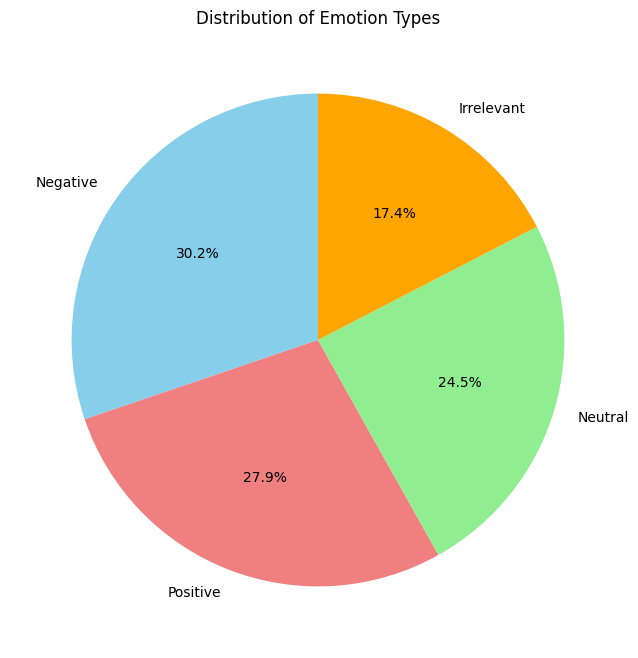

In [154]:
import matplotlib.pyplot as plt

# Check the distribution of the 'type' column
type_counts = train_df['type'].value_counts()

# Define colors for each emotion type
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Emotion Types')
plt.show()

In [155]:
# Identify and replace object datatype columns with numerical labels
object_cols = train_df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in object_cols:
    train_df[col] = le.fit_transform(train_df[col])

<Axes: xlabel='type', ylabel='id'>

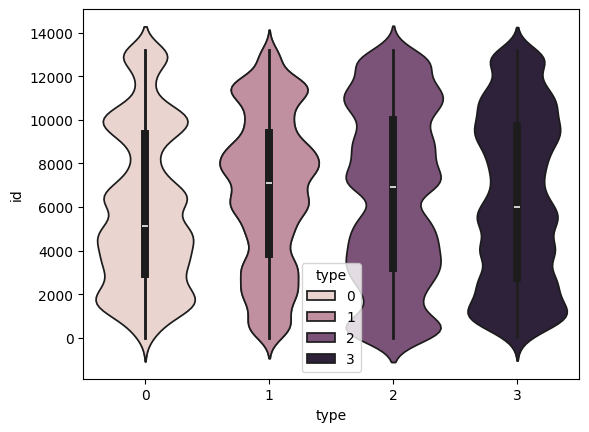

In [156]:
# Assuming 'type' is a categorical variable and 'x_variable' is a numeric variable in your DataFrame
sns.violinplot(data=train_df, x='type', y='id')
# Assuming 'type' is a categorical variable and 'x_variable' and 'hue_variable' are numeric variables in your DataFrame
sns.violinplot(data=train_df, x='type', y='id', hue='type')

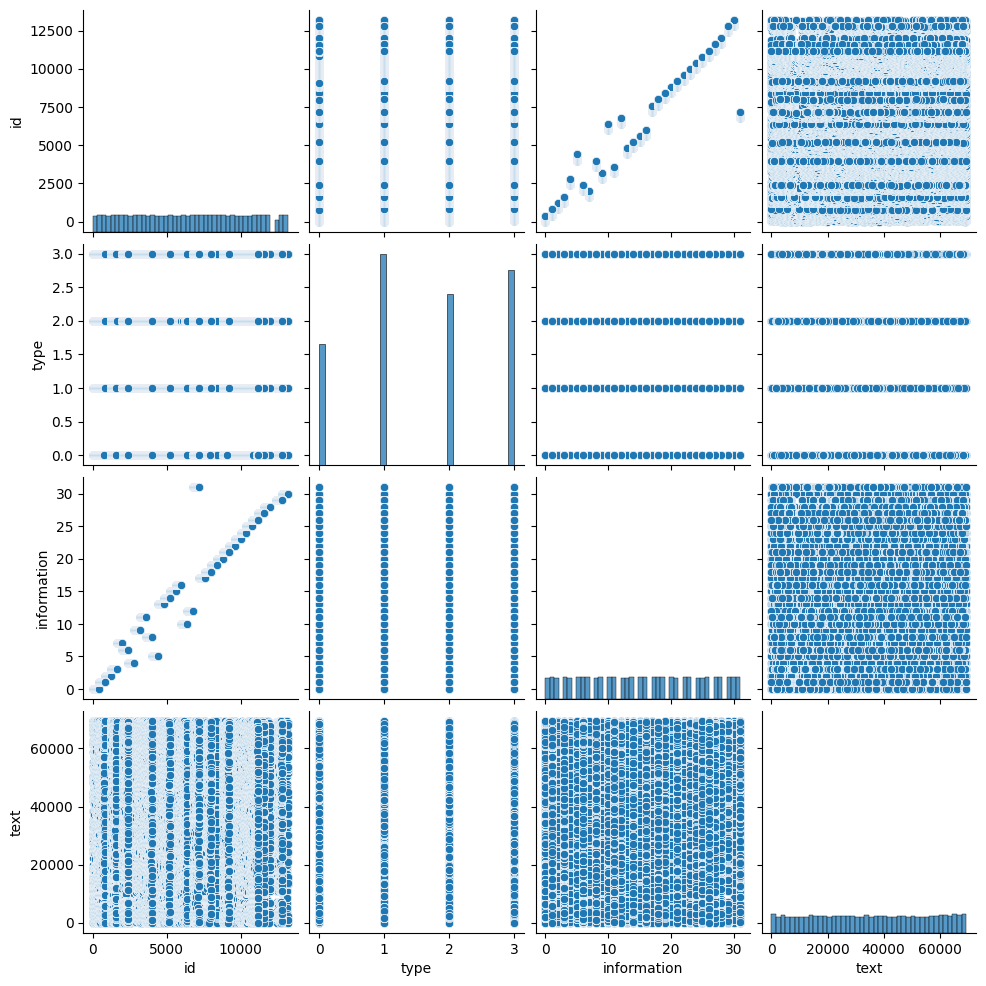

In [157]:
sns.pairplot(train_df[['id','type','information','text']])
plt.show()

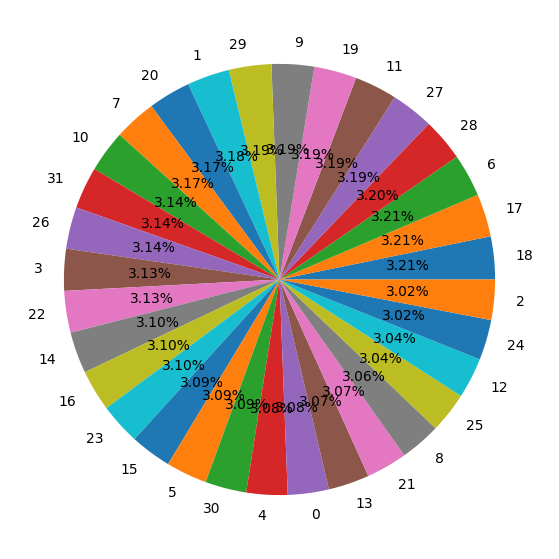

In [158]:
plt.figure(figsize=(10,7))
plt.pie(x=train_df['information'].value_counts().values,
        labels=train_df['information'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

In [159]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization and removing stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\as200\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\as200\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [160]:
def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and links
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenization and removing stopwords
        stop_words = set(stopwords.words('english'))
        words = word_tokenize(text)
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        # If the input is not a string, return it as is
        return text

train_df['preprocessed_text'] = train_df['text'].apply(preprocess_text)

In [161]:
# Apply the preprocess_text function to the 'text' column
validation_df['preprocessed_text'] = validation_df['text'].apply(preprocess_text)
validation_df

,id,information,type,text,preprocessed_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp ive madeleine mccann cellar past yea...
...,...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins


In [162]:
def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters and links
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenization and removing stopwords
        stop_words = set(stopwords.words('english'))
        words = word_tokenize(text)
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        # If the input is not a string, return it as is
        return text

train_df['preprocessed_text'] = train_df['preprocessed_text'].apply(preprocess_text)
validation_df['preprocessed_text'] = validation_df['preprocessed_text'].apply(preprocess_text)

In [163]:
# Convert the 'type' column of both datasets to string
train_df['type'] = train_df['type'].astype(str)
validation_df['type'] = validation_df['type'].astype(str)

# Combine the 'type' column of both datasets
combined_labels = pd.concat([train_df['type'], validation_df['type']])

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the combined labels
label_encoder.fit(combined_labels)

# Now you can transform the labels in both datasets
train_labels_encoded = label_encoder.transform(train_df['type'])
validation_labels_encoded = label_encoder.transform(validation_df['type'])

In [164]:
# Convert the 'preprocessed_text' column of both datasets to string
train_df['preprocessed_text'] = train_df['preprocessed_text'].astype(str)
validation_df['preprocessed_text'] = validation_df['preprocessed_text'].astype(str)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the 'max_features' parameter based on your dataset

# Fit and transform the training data
tfidf_train_features = tfidf_vectorizer.fit_transform(train_df['preprocessed_text'])

# Transform the validation data using the same vectorizer
tfidf_validation_features = tfidf_vectorizer.transform(validation_df['preprocessed_text'])


In [165]:
# Import XGBoost
from xgboost import XGBClassifier

# Instantiate the XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the classifier on the TF-IDF training features and encoded labels
xgb_classifier.fit(tfidf_train_features, train_labels_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [166]:
# Predict the encoded labels for the TF-IDF validation features
validation_predictions_xgb_encoded = xgb_classifier.predict(tfidf_validation_features)

# Decode the predicted labels back to the original class labels
validation_predictions_xgb = label_encoder.inverse_transform(validation_predictions_xgb_encoded)


In [167]:
# Display additional classification metrics for XGBoost
print("XGBoost Classification Report:")
print(classification_report(validation_df['type'], validation_predictions_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
  Irrelevant       0.00      0.00      0.00     171.0
    Negative       0.00      0.00      0.00     266.0
     Neutral       0.00      0.00      0.00     285.0
    Positive       0.00      0.00      0.00     277.0

    accuracy                           0.00     999.0
   macro avg       0.00      0.00      0.00     999.0
weighted avg       0.00      0.00      0.00     999.0



C:\Users\as200\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\as200\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\as200\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

In [168]:
# Assuming you have defined the preprocess_text function

# Example user input
user_input = "Platinum is the best loot @Borderlands"

# Preprocess the user input
user_input_processed = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# Predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# Decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}")

The predicted type for the input text is: 1


In [169]:
# Example user input
user_input = "This is shitty. I get that profit-wise it was less business expected prior to a huge problem."

# Preprocess the user input
user_input_processed = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# Predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# Decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}")

The predicted type for the input text is: 1


In [170]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the processed titles
tf = vectorizer.fit_transform(train_df['preprocessed_text'])

# Initialize LDA Model with 10 topics
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

# Fit the model on TF-IDF features
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [171]:
# Define the brands you're interested in
brands = ['Borderlands', 'Facebook', 'Amazon', 'Microsoft', 'CS-GO', 'Google', 'FIFA', 'MaddenNFL', 'TomClancysRainbowSix', 'AssassinsCreed', 'CallOfDuty', 'Dota2']

# Create a new column for each brand and check if the brand is mentioned in the text
for brand in brands:
    train_df[brand] = train_df['preprocessed_text'].apply(lambda x: 1 if brand.lower() in x else 0)

In [172]:
print(train_df.head())

     id  information type   text preprocessed_text  Borderlands  Facebook  \
0  2401            4    3  27233             27233            0         0   
1  2401            4    3  64618             64618            0         0   
2  2401            4    3  64602             64602            0         0   
3  2401            4    3  64617             64617            0         0   
4  2401            4    3  64616             64616            0         0   

   Amazon  Microsoft  CS-GO  Google  FIFA  MaddenNFL  TomClancysRainbowSix  \
0       0          0      0       0     0          0                     0   
1       0          0      0       0     0          0                     0   
2       0          0      0       0     0          0                     0   
3       0          0      0       0     0          0                     0   
4       0          0      0       0     0          0                     0   

   AssassinsCreed  CallOfDuty  Dota2  
0               0           0

In [173]:
#Loading the training and validation datasets
train_data = pd.read_csv("twitter_training.csv")
validation_data = pd.read_csv("twitter_validation.csv")

In [174]:
train_head = train_data.head()
validation_head = validation_data.head()

train_head, validation_head

(   2401  Borderlands  Positive  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
   im getting on borderlands and i will murder you all ,  
 0  I am coming to the borders and I will kill you...     
 1  im getting on borderlands and i will kill you ...     
 2  im coming on borderlands and i will murder you...     
 3  im getting on borderlands 2 and i will murder ...     
 4  im getting into borderlands and i can murder y...     ,
    3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy,

In [175]:
train_data.columns=['TweetID','Entity','Sentiment','Tweet Content']
train_data.head()

,TweetID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [176]:
validation_head.columns=['TweetID','Entity','Sentiment','Tweet Content']
validation_head.head()

,TweetID,Entity,Sentiment,Tweet Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [177]:
#Checking for missing values
missing_train = train_data.isnull().sum()
missing_validation = validation_data.isnull().sum()

In [178]:
#Checking for duplicate rows
duplicates_train = train_data.duplicated().sum()
duplicates_validation = validation_data.duplicated().sum()

missing_train, missing_validation, duplicates_train, duplicates_validation

(TweetID            0
 Entity             0
 Sentiment          0
 Tweet Content    686
 dtype: int64,
 3364                                                                                                                                                                                                                                                  0
 Facebook                                                                                                                                                                                                                                              0
 Irrelevant                                                                                                                                                                                                                                            0
 I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayle

In [179]:
#Checking the distribution of sentiment labels
train_sentiment_distribution = train_data.iloc[:, 2].value_counts()
validation_sentiment_distribution = validation_data.iloc[:, 2].value_counts()

In [180]:
#Checking the number of unique entities in the training set
unique_entities_train = train_data.iloc[:, 1].nunique()

train_sentiment_distribution, validation_sentiment_distribution, unique_entities_train

(Sentiment
 Negative      22542
 Positive      20831
 Neutral       18318
 Irrelevant    12990
 Name: count, dtype: int64,
 Irrelevant
 Neutral       285
 Positive      277
 Negative      266
 Irrelevant    171
 Name: count, dtype: int64,
 32)

In [181]:
#Removing duplicate rows from the training set
train_data_cleaned = train_data.drop_duplicates()

In [182]:
#Dropping rows with missing tweet/message values
train_data_cleaned = train_data_cleaned.dropna(subset=[train_data.columns[3]])

In [183]:
#Verifying the cleaning
remaining_duplicates_train = train_data_cleaned.duplicated().sum()
remaining_missing_train = train_data_cleaned.isnull().sum()

remaining_duplicates_train, remaining_missing_train

(0,
 TweetID          0
 Entity           0
 Sentiment        0
 Tweet Content    0
 dtype: int64)

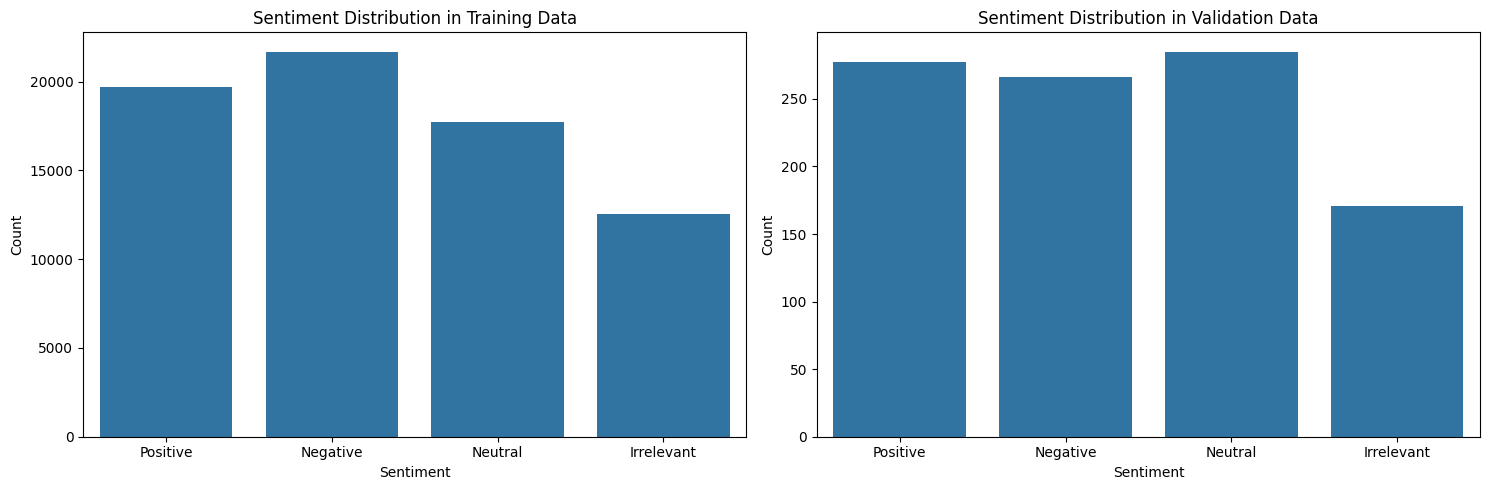

In [184]:
#Setting up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Plotting sentiment distribution for training data
sns.countplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

#Plotting sentiment distribution for validation data
sns.countplot(data=validation_data, x=validation_data.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

C:\Users\as200\AppData\Local\Temp\ipykernel_22308\4270300933.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')


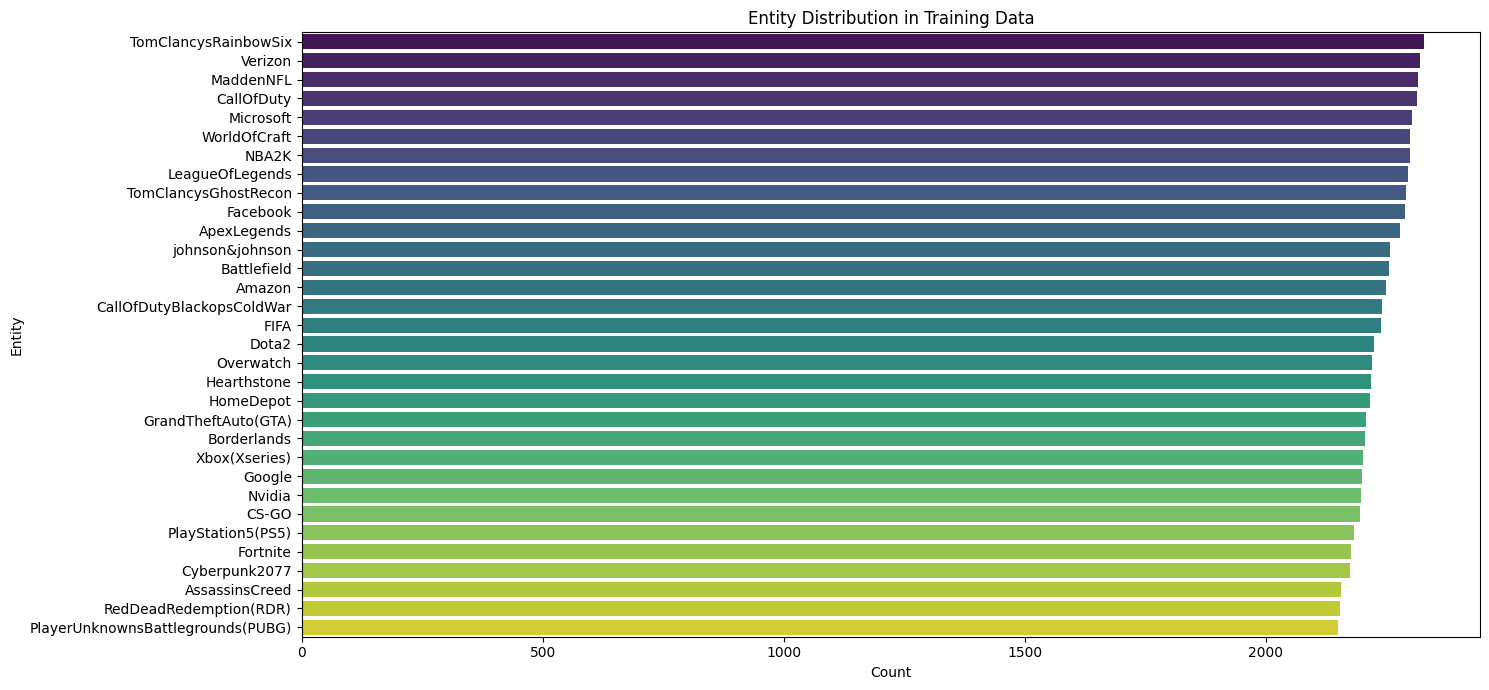

In [185]:
#Setting up the plot
plt.figure(figsize=(15, 7))

#Plotting entity distribution for training data
sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

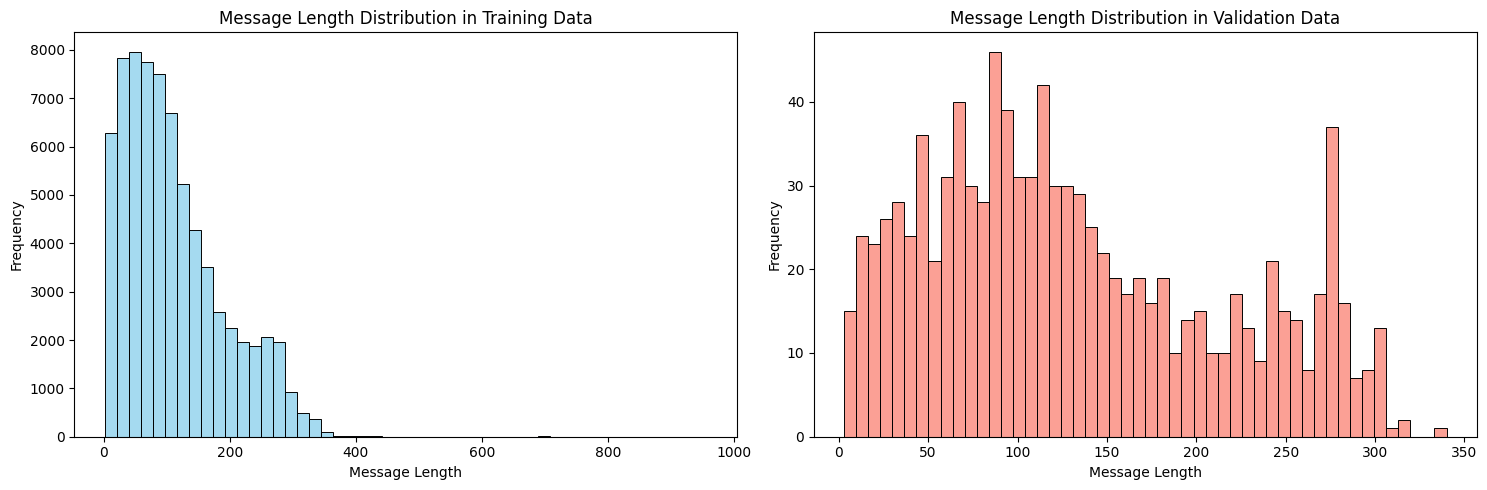

In [186]:
#Calculating the length of each message
train_data_cleaned['message_length'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(len)
validation_data['message_length'] = validation_data[validation_data.columns[3]].apply(len)

#Setting up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Plotting message length distribution for training data
sns.histplot(train_data_cleaned['message_length'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

#Plotting message length distribution for validation data
sns.histplot(validation_data['message_length'], bins=50, ax=ax[1], color='salmon')
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')

plt.tight_layout()
plt.show()

C:\Users\as200\AppData\Local\Temp\ipykernel_22308\690367956.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], y='message_length', ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
C:\Users\as200\AppData\Local\Temp\ipykernel_22308\690367956.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=validation_data, x=validation_data.columns[2], y='message_length', ax=ax[1], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])


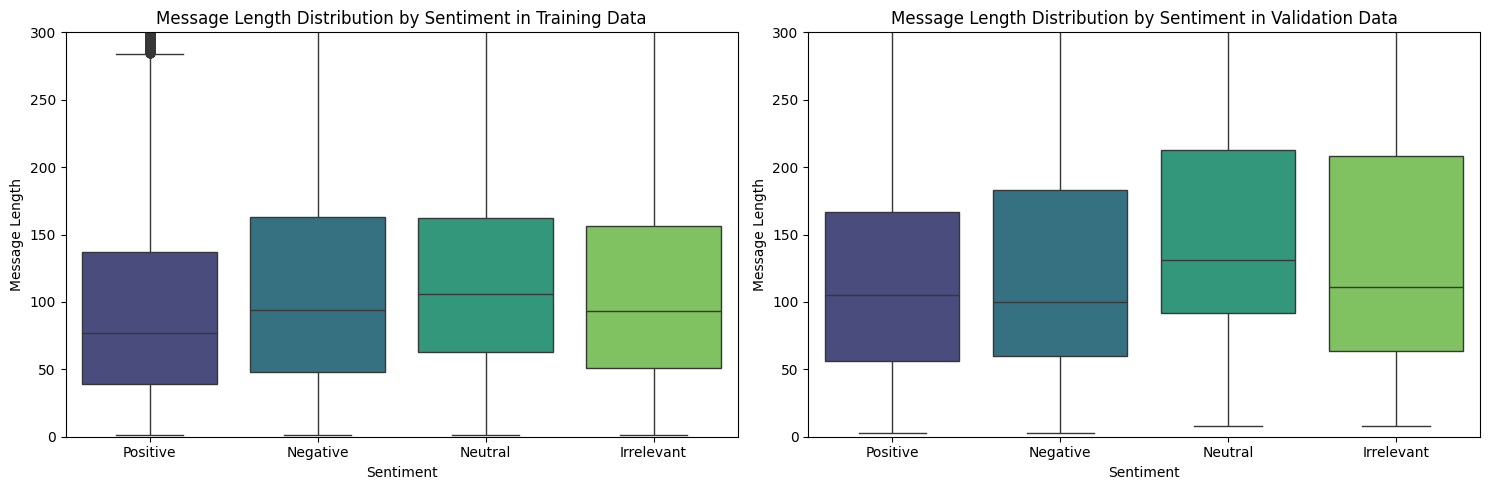

In [187]:
#Setting up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Plotting message length distribution by sentiment for training data
sns.boxplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], y='message_length', ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[0].set_title('Message Length Distribution by Sentiment in Training Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylim(0, 300)  # limiting y-axis for better visualization

#Plotting message length distribution by sentiment for validation data
sns.boxplot(data=validation_data, x=validation_data.columns[2], y='message_length', ax=ax[1], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[1].set_title('Message Length Distribution by Sentiment in Validation Data')
ax[1].set_ylabel('Message Length')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylim(0, 300)  # limiting y-axis for better visualization

plt.tight_layout()
plt.show()

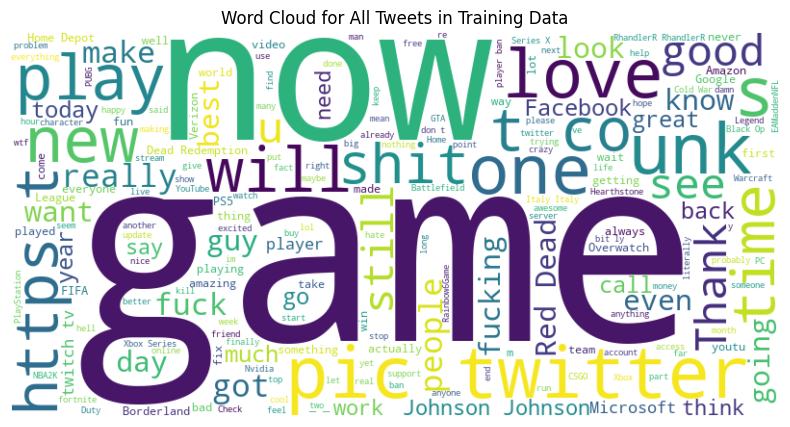

In [188]:
#Generating the word cloud for the entire training dataset
from wordcloud import WordCloud
all_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned.columns[3]])
wordcloud_all = WordCloud(background_color='white', width=800, height=400).generate(all_text)
#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Tweets in Training Data')
plt.show()

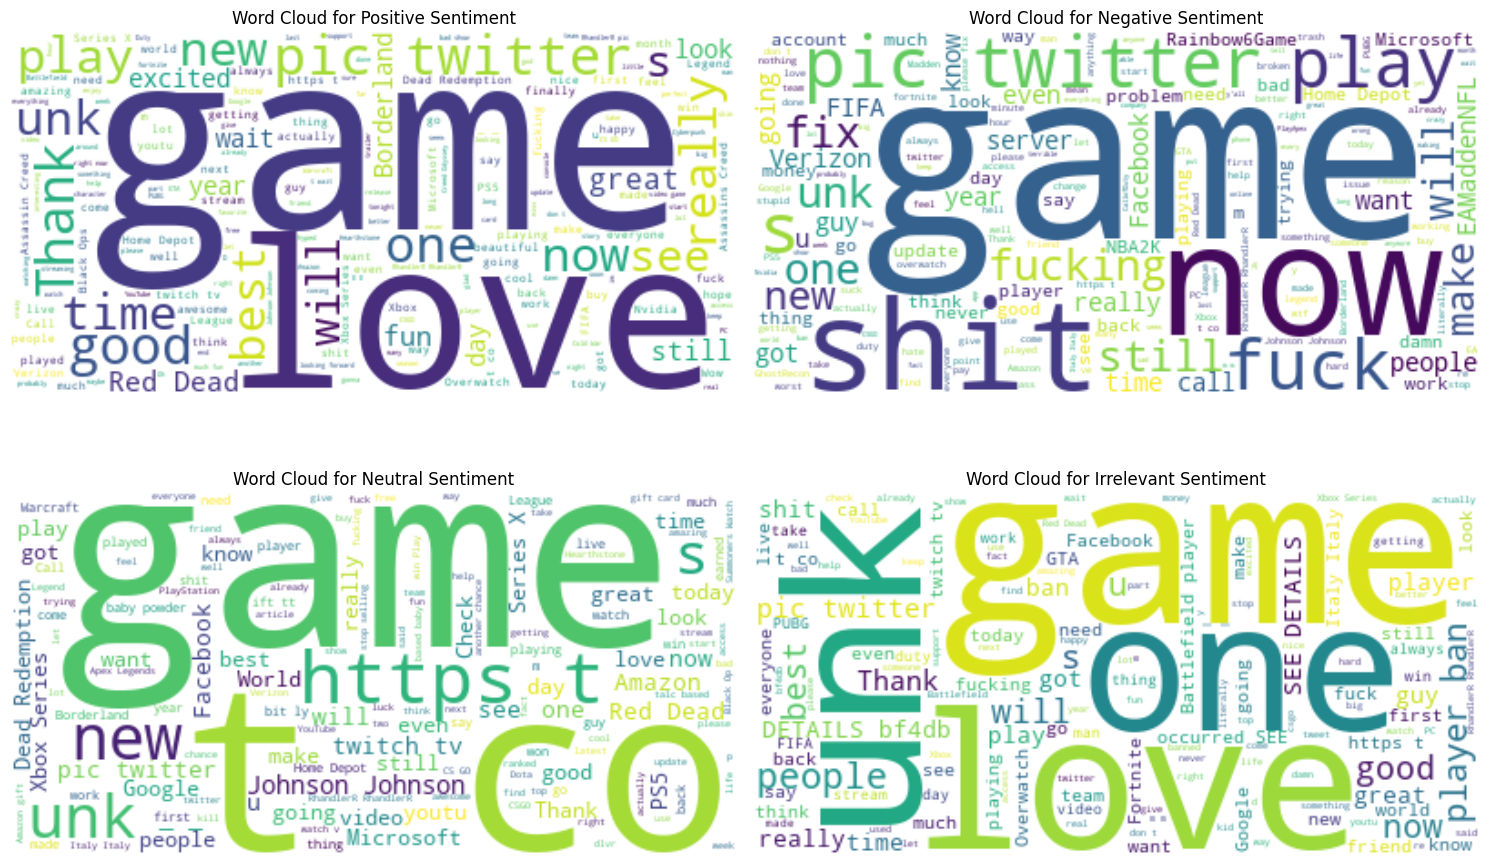

In [189]:
#Initializing sentiment categories
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

#Setting up the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#Generating and plotting word clouds for each sentiment
for sentiment, ax in zip(sentiments, axs.ravel()):
    sentiment_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned[train_data_cleaned.columns[2]] == sentiment][train_data_cleaned.columns[3]])
    wordcloud_sentiment = WordCloud(background_color='white', width=400, height=200).generate(sentiment_text)

    ax.imshow(wordcloud_sentiment, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {sentiment} Sentiment')

plt.tight_layout()
plt.show()

In [190]:
#Alternative function to preprocess text without lemmatization or NLTK stopwords
def preprocess_text_simplified(text):
    #Converting to lowercase
    text = text.lower()
    #Simple tokenization using split (without relying on NLTK)
    tokens = text.split()
    #Removing special characters and numbers
    tokens = [token for token in tokens if token.isalpha()]
    return " ".join(tokens)

#Applying simplified preprocessing to training data
train_data_cleaned['processed_message_simplified'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(preprocess_text_simplified)

#Extracting most frequent terms using CountVectorizer with simplified preprocessing
vectorizer_simplified = CountVectorizer(max_features=20)
X_simplified = vectorizer_simplified.fit_transform(train_data_cleaned['processed_message_simplified'])
frequent_terms_simplified = vectorizer_simplified.get_feature_names_out()

frequent_terms_simplified

array(['and', 'but', 'for', 'game', 'have', 'in', 'is', 'it', 'just',
       'my', 'not', 'of', 'on', 'so', 'that', 'the', 'this', 'to', 'with',
       'you'], dtype=object)

In [191]:
#Adjusting the labels: Convert "Irrelevant" labels to "Neutral"
train_data_cleaned[train_data_cleaned.columns[2]] = train_data_cleaned[train_data_cleaned.columns[2]].replace('Irrelevant', 'Neutral')
validation_data[validation_data.columns[2]] = validation_data[validation_data.columns[2]].replace('Irrelevant', 'Neutral')

In [192]:
updated_train_sentiment_distribution = train_data_cleaned[train_data_cleaned.columns[2]].value_counts()
updated_train_sentiment_distribution

Sentiment
Neutral     30245
Negative    21698
Positive    19712
Name: count, dtype: int64

In [193]:
updated_validation_sentiment_distribution = validation_data[validation_data.columns[2]].value_counts()
updated_validation_sentiment_distribution

Irrelevant
Neutral     456
Positive    277
Negative    266
Name: count, dtype: int64

In [194]:
#Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for computational efficiency

#Fitting and transforming the preprocessed text from the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data_cleaned['processed_message_simplified'])

#Applying simplified preprocessing to the validation data
validation_data['processed_message_simplified'] = validation_data[validation_data.columns[3]].apply(preprocess_text_simplified)

#Transforming the preprocessed text from the validation data
X_validation_tfidf = tfidf_vectorizer.transform(validation_data['processed_message_simplified'])

#Extracting target labels for training and validation
y_train = train_data_cleaned[train_data_cleaned.columns[2]]
y_validation = validation_data[validation_data.columns[2]]

X_train_tfidf.shape, X_validation_tfidf.shape

((71655, 5000), (999, 5000))

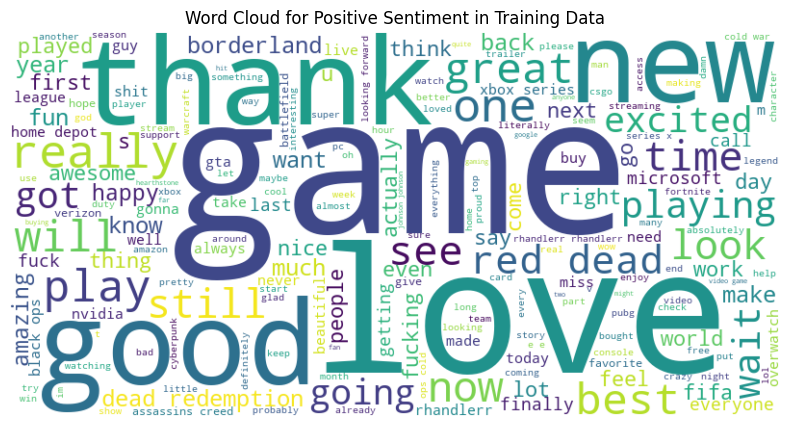

In [195]:
#Extracting text for Positive sentiment from the training dataset
positive_text = " ".join(tweet for tweet in train_data_cleaned[train_data_cleaned[train_data_cleaned.columns[2]] == 'Positive']['processed_message_simplified'])

#Generating word cloud for Positive sentiment
wordcloud_positive = WordCloud(background_color='white', width=800, height=400).generate(positive_text)

#Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment in Training Data')
plt.show()

In [196]:
#The target variable for training and validation again
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
y_train = train_data_cleaned[train_data_cleaned.columns[2]]
y_validation = validation_data[validation_data.columns[2]]

#Creating the ML pipeline with TF-IDF vectorization and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression(solver='sag', multi_class='auto', max_iter=10000))  # using 'sag' solver for faster convergence
])

#Training the pipeline model using the training data
pipeline.fit(train_data_cleaned['processed_message_simplified'], y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(max_iter=10000, solver='sag'))])

In [197]:
#Validating the model's performance on the validation dataset
validation_accuracy = pipeline.score(validation_data['processed_message_simplified'], y_validation)
validation_accuracy

0.8048048048048048

In [198]:
#Validating the model's performance on the training dataset
training_accuracy = pipeline.score(train_data_cleaned['processed_message_simplified'], y_train)
training_accuracy

0.7466471286023306

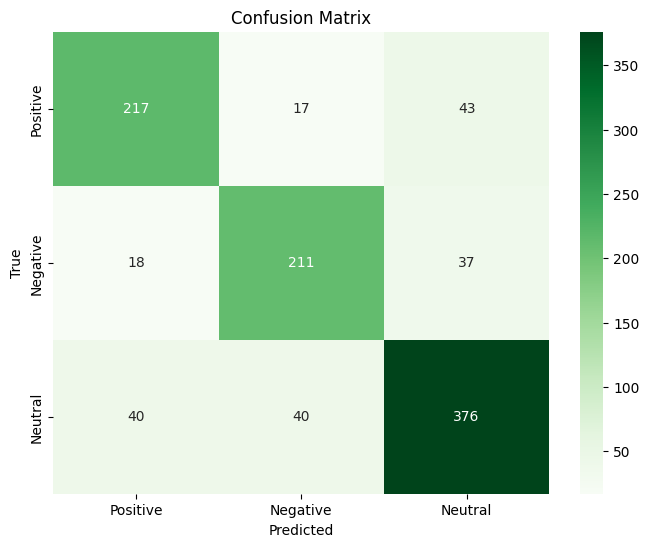

In [199]:
#Generating predictions on the validation data
y_validation_pred = pipeline.predict(validation_data['processed_message_simplified'])

#Creating a confusion matrix
conf_matrix = confusion_matrix(y_validation, y_validation_pred, labels=['Positive', 'Negative', 'Neutral'])

#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

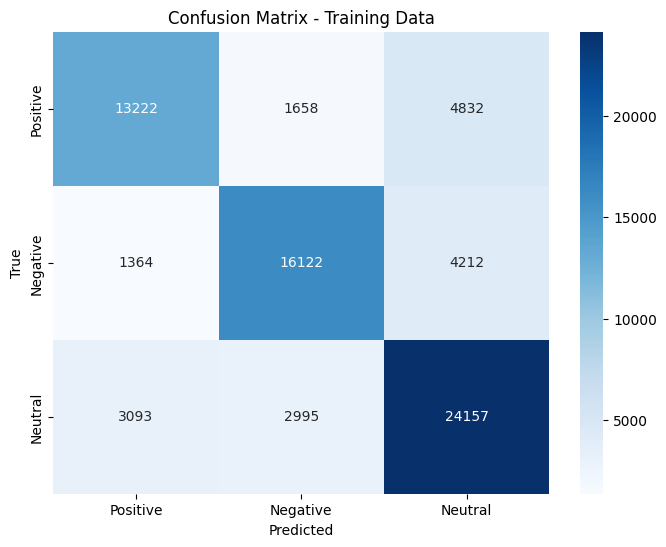

In [200]:
#Generating predictions on the training data
y_train_pred = pipeline.predict(train_data_cleaned['processed_message_simplified'])

#Creating a confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred, labels=['Positive', 'Negative', 'Neutral'])

#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

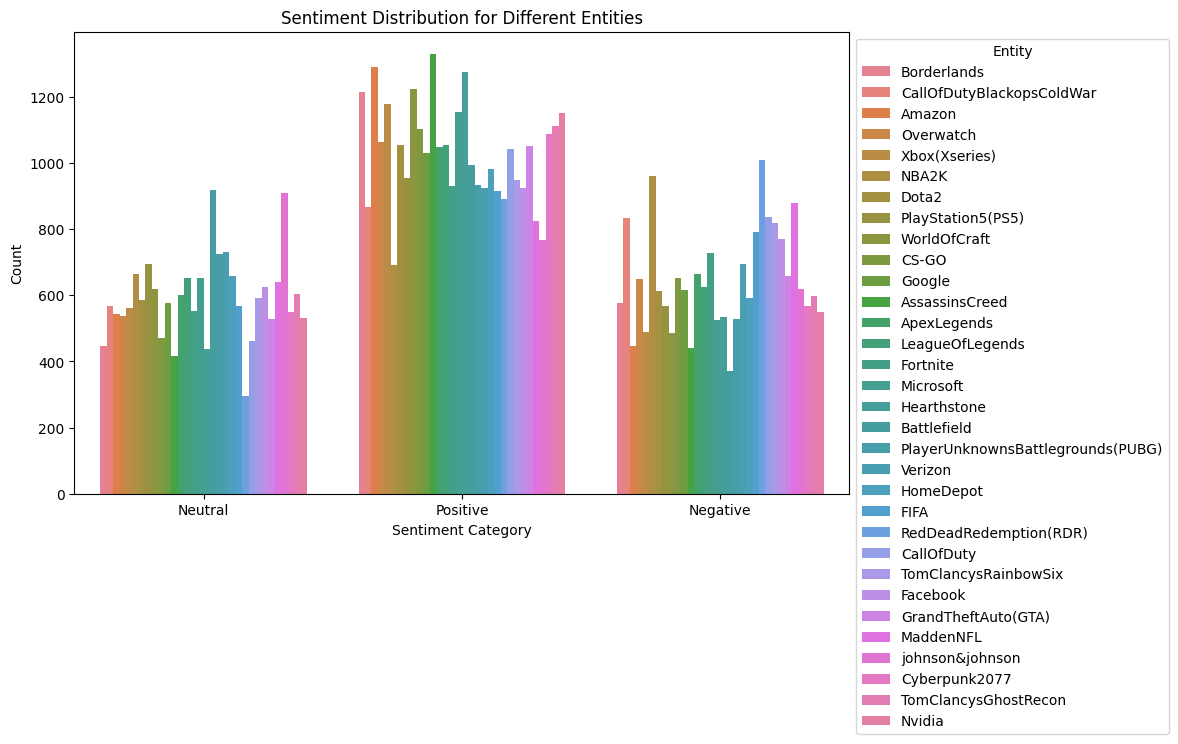

In [201]:
#Loading training and validation dataset
col=['Id' , 'Entity' , 'Sentiment' , 'Content']
df_train=pd.read_csv("twitter_training.csv" , names=col)
df_test=pd.read_csv("twitter_validation.csv" , names=col)
from textblob import TextBlob

# Concatenate train and test data for a comprehensive analysis
all_data = pd.concat([train_data_cleaned, df_test], ignore_index=True)

# Sentiment analysis using TextBlob
all_data['polarity'] = all_data['Tweet Content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Map polarity values to sentiment categories
all_data['sentiment_category'] = all_data['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sentiment_category', data=all_data, hue='Entity')

# Move the legend to the side
ax.legend(title='Entity', bbox_to_anchor=(1, 1), loc='upper left')

plt.title('Sentiment Distribution for Different Entities')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()